In [3]:
!pip install --upgrade bigframes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 520.8/520.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
  Attempting uninstall: bigframes
    Found existing installation: bigframes 1.0.0
    Uninstalling bigframes-1.0.0:
      Successfully uninstalled bigframes-1.0.0


In [29]:
#@title Setup Project Variables { run: "auto", display-mode: "form" }
PROJECT_ID = "direct-outlet-420617" #@param {type:"string"}
DATASET_NAME = "Electric_Vehicle_population" #@param {type:"string"}
MODEL_NAME = "bqdf_vehicle_segment_cluster" #@param {type:"string"}
EVAL_NAME = MODEL_NAME + "_eval"
LOCATION = "US"  # @param {type:"string"}
from google.cloud import bigquery
client = bigquery.Client()

In [30]:
dataset = client.create_dataset(DATASET_NAME, timeout=30)  # Make an API request.
print("Created dataset {}.{}".format(client.project, dataset.dataset_id))

Created dataset direct-outlet-420617.Electric_Vehicle_population


In [31]:
#data exploration
import bigframes as bf
import bigframes.pandas as bpd

In [32]:
bf.options.bigquery.project = PROJECT_ID
bf.options.bigquery.location = LOCATION

In [35]:
query = f"""
SELECT *
FROM `{PROJECT_ID}.{DATASET_NAME}.{'Electric_vehicle'}`
"""

# Execute the query and fetch results
query_job = client.query(query)  # Make an API request
results = query_job.result()  # Wait for job to complete and get results

# Load results into a Pandas DataFrame
data = [dict(row) for row in results]  # Convert row results to dictionaries
df = bpd.DataFrame(data)  # Create DataFrame from list of dictionaries

   VIN__1_10_   County     City State  Postal_Code  Model_Year    Make  \
0  3FA6P0SU2E  Spokane  Spokane    WA      99207.0        2014    FORD   
1  JTDKN3DP5F  Spokane  Spokane    WA      99207.0        2015  TOYOTA   
2  JTDKARFP1H  Spokane  Spokane    WA      99207.0        2017  TOYOTA   
3  3FA6P0PU4D  Spokane  Spokane    WA      99207.0        2013    FORD   
4  1C4JJXR60N  Spokane  Spokane    WA      99207.0        2022    JEEP   

           Model                   Electric_Vehicle_Type  \
0         FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
1  PRIUS PLUG-IN  Plug-in Hybrid Electric Vehicle (PHEV)   
2    PRIUS PRIME  Plug-in Hybrid Electric Vehicle (PHEV)   
3         FUSION  Plug-in Hybrid Electric Vehicle (PHEV)   
4       WRANGLER  Plug-in Hybrid Electric Vehicle (PHEV)   

  Clean_Alternative_Fuel_Vehicle__CAFV__Eligibility  Electric_Range  \
0             Not eligible due to low battery range              19   
1             Not eligible due to low battery range 

In [37]:
# Print the first few rows of the DataFrame (optional)
df.head()

,VIN__1_10_,County,City,State,Postal_Code,Model_Year,Make,Model,Electric_Vehicle_Type,Clean_Alternative_Fuel_Vehicle__CAFV__Eligibility,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,Vehicle_Location,Electric_Utility,_2020_Census_Tract
0,3FA6P0SU2E,Spokane,Spokane,WA,99207.0,2014,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,3.0,196204053,POINT (-117.39787 47.67936),MODERN ELECTRIC WATER COMPANY,53063001600.0
1,JTDKN3DP5F,Spokane,Spokane,WA,99207.0,2015,TOYOTA,PRIUS PLUG-IN,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,6,0,3.0,257412284,POINT (-117.39787 47.67936),MODERN ELECTRIC WATER COMPANY,53063001600.0
2,JTDKARFP1H,Spokane,Spokane,WA,99207.0,2017,TOYOTA,PRIUS PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,25,0,3.0,181736264,POINT (-117.39787 47.67936),MODERN ELECTRIC WATER COMPANY,53063001600.0
3,3FA6P0PU4D,Spokane,Spokane,WA,99207.0,2013,FORD,FUSION,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,19,0,3.0,175243848,POINT (-117.39787 47.67936),MODERN ELECTRIC WATER COMPANY,53063001600.0
4,1C4JJXR60N,Spokane,Spokane,WA,99207.0,2022,JEEP,WRANGLER,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,22,0,3.0,204662489,POINT (-117.39787 47.67936),MODERN ELECTRIC WATER COMPANY,53063001600.0


In [36]:
df.shape

(177866, 17)

In [40]:
# Summary statistics
summary_stats = df.describe()
print(summary_stats)


        Postal_Code   Model_Year  Electric_Range    Base_MSRP  \
count      177861.0     177866.0        177866.0     177866.0   
mean   98172.453506  2020.515512       58.842162  1073.109363   
std     2442.450668     2.989384       91.981298  8358.624956   
min          1545.0       1997.0             0.0          0.0   
25%         98052.0       2019.0             0.0          0.0   
50%         98122.0       2022.0             0.0          0.0   
75%         98370.0       2023.0            75.0          0.0   
max         99577.0       2024.0           337.0     845000.0   

       Legislative_District    DOL_Vehicle_ID  _2020_Census_Tract  
count              177477.0          177866.0            177861.0  
mean              29.127481  220231266.054549  52976721055.557243  
std               14.892169   75849866.122565   1578046771.166911  
min                     1.0            4385.0        1001020100.0  
25%                    17.0       180708608.0       53033009802.0  
50%   

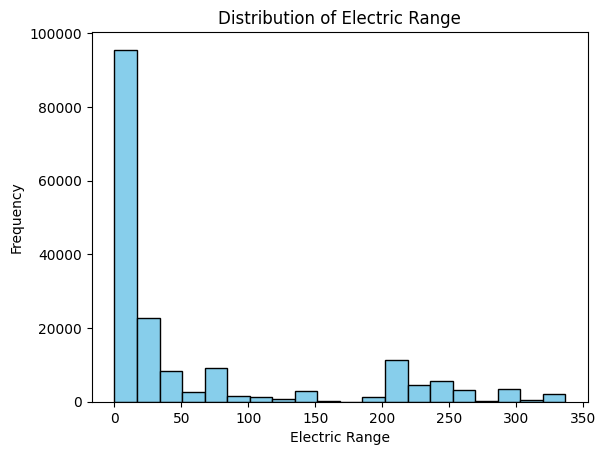

In [41]:
import matplotlib.pyplot as plt
plt.hist(df['Electric_Range'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Electric Range')
plt.ylabel('Frequency')
plt.title('Distribution of Electric Range')
plt.show()

In [42]:
# Count of electric vehicles by make
make_counts = df['Make'].value_counts()
print(make_counts)

# Count of electric vehicles by model year
model_year_counts = df['Model_Year'].value_counts()
print(model_year_counts)


Make
TESLA            79659
NISSAN           13998
CHEVROLET        13678
FORD              9199
BMW               7570
KIA               7432
TOYOTA            6288
VOLKSWAGEN        5004
JEEP              4480
HYUNDAI           4406
RIVIAN            4312
VOLVO             4133
AUDI              3646
CHRYSLER          2993
MERCEDES-BENZ     1589
PORSCHE           1139
MITSUBISHI         958
MINI               898
POLESTAR           882
HONDA              833
SUBARU             831
FIAT               784
DODGE              568
MAZDA              476
CADILLAC           382
Name: count, dtype: Int64


Model_Year
2023    57587
2022    27776
2021    19132
2018    14323
2020    11768
2019    10940
2017     8562
2024     7080
2016     5483
2015     4844
2013     4409
2014     3509
2012     1618
2011      775
2010       23
2008       20
2000        7
1999        5
2002        2
1997        1
1998        1
2003        1
Name: count, dtype: Int64


In [47]:
# Correlation matrix
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_df.corr()
correlation_matrix

,Postal_Code,Model_Year,Electric_Range,Base_MSRP,Legislative_District,DOL_Vehicle_ID,_2020_Census_Tract
Postal_Code,1.0,-0.000064,-0.000402,-0.003592,-0.411117,0.006472,0.497517
Model_Year,-0.000064,1.0,-0.476852,-0.230492,-0.016408,0.134835,0.007564
Electric_Range,-0.000402,-0.476852,1.0,0.108231,0.021739,-0.093874,-0.000929
Base_MSRP,-0.003592,-0.230492,0.108231,1.0,0.011902,-0.027383,-0.000613
Legislative_District,-0.411117,-0.016408,0.021739,0.011902,1.0,-0.012128,-0.103165
DOL_Vehicle_ID,0.006472,0.134835,-0.093874,-0.027383,-0.012128,1.0,0.003449
_2020_Census_Tract,0.497517,0.007564,-0.000929,-0.000613,-0.103165,0.003449,1.0


Exception ignored in: <generator object RowIterator._to_page_iterable at 0x7e95a3dcb8b0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/cloud/bigquery/table.py", line 1688, in _to_page_iterable
    yield from result_pages
  File "/usr/local/lib/python3.10/dist-packages/google/cloud/bigquery/_pandas_helpers.py", line 973, in _download_table_bqstorage
    pool.shutdown(wait=True)
  File "/usr/lib/python3.10/concurrent/futures/thread.py", line 235, in shutdown
    t.join()
  File "/usr/lib/python3.10/threading.py", line 1096, in join
    self._wait_for_tstate_lock()
  File "/usr/lib/python3.10/threading.py", line 1116, in _wait_for_tstate_lock
    if lock.acquire(block, timeout):
KeyboardInterrupt: 


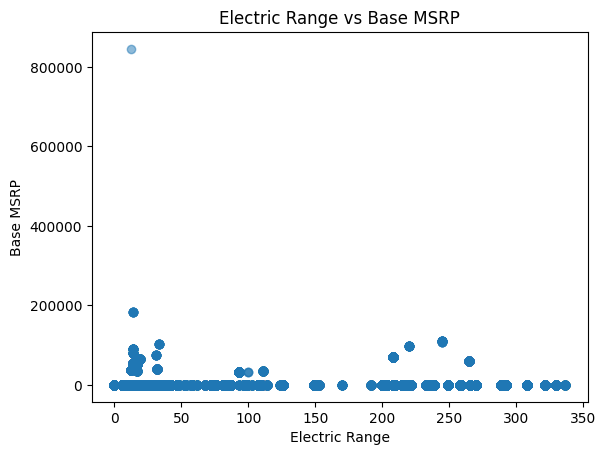

In [48]:

# Scatter plot of Electric Range vs Base MSRP
plt.scatter(df['Electric_Range'], df['Base_MSRP'], alpha=0.5)
plt.xlabel('Electric Range')
plt.ylabel('Base MSRP')
plt.title('Electric Range vs Base MSRP')
plt.show()


In [50]:
# Count of electric vehicles by state
state_counts = df['State'].value_counts()
print(state_counts)

# Count of electric vehicles by county
county_counts = df['County'].value_counts()
print(county_counts)

# Count of electric vehicles by city
city_counts = df['City'].value_counts()
print(city_counts)


State
WA    177477
CA       101
VA        46
MD        31
TX        23
NC        16
IL        15
CO        12
AZ        10
FL        10
HI         9
NJ         8
NV         8
NY         7
SC         7
AL         6
CT         6
GA         6
MA         5
MO         5
OR         5
LA         4
OH         4
PA         4
BC         3
Name: count, dtype: Int64


County
King            92740
Snohomish       21001
Pierce          13782
Clark           10416
Thurston         6428
Kitsap           5840
Spokane          4586
Whatcom          4253
Benton           2147
Skagit           1910
Island           1882
Clallam          1058
Chelan           1047
Yakima            995
Jefferson         977
San Juan          942
Cowlitz           897
Mason             823
Lewis             739
Grays Harbor      625
Kittitas          623
Franklin          585
Grant             561
Walla Walla       437
Douglas           366
Name: count, dtype: Int64


City
Seattle              29447
Bellevue              8931
Redmond               6478
Vancouver             6193
Bothell               5863
Kirkland              5362
Sammamish             5280
Renton                4980
Olympia               4299
Tacoma                3722
Bellingham            2941
Tukwila               2927
Kent                  2782
Issaquah              2764
Spokane               2735
Lynnwood              2726
Everett               2475
Woodinville           2352
Mercer Island         2344
Snohomish             2102
Shoreline             1953
Gig Harbor            1949
Auburn                1897
Edmonds               1896
Bainbridge Island     1760
Name: count, dtype: Int64


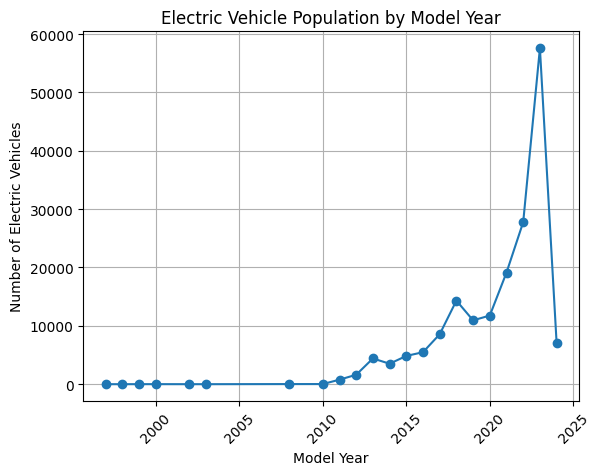

In [51]:
# Count of electric vehicles by model year
model_year_counts = df['Model_Year'].value_counts().sort_index()
plt.plot(model_year_counts.index, model_year_counts.values, marker='o')
plt.xlabel('Model Year')
plt.ylabel('Number of Electric Vehicles')
plt.title('Electric Vehicle Population by Model Year')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
